[link](https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@7e517b97331f48e38ba0035df6ef8621/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@90069b918e404e85be18eed0c8039934)

+ ноутбук ML-8._Ensembles

Существует три основных способа построения ансамблей:

Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 
Бэггинг (bagging) — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам случайный лес (Random Forest). 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи классификации ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи регрессии же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Давайте рассмотрим это на примере. 

Для задачи регрессии ансамблирование р

Для задачи регрессии ансамблирование решения 10 случайных деревьев есть не что иное, как среднее значение предсказаний данных моделей. Пускай вектор ответов моделей равен out = [0.5, 0.6, 0.2, 0.4, 0.9, 1.0, -0.5, 0.3, 0.2, 0.0]. 

Посчитаем среднее значение: 

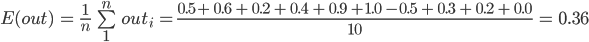

Итак, среднее значение вектора out равно 0.36, что и является предсказанием случайного леса.

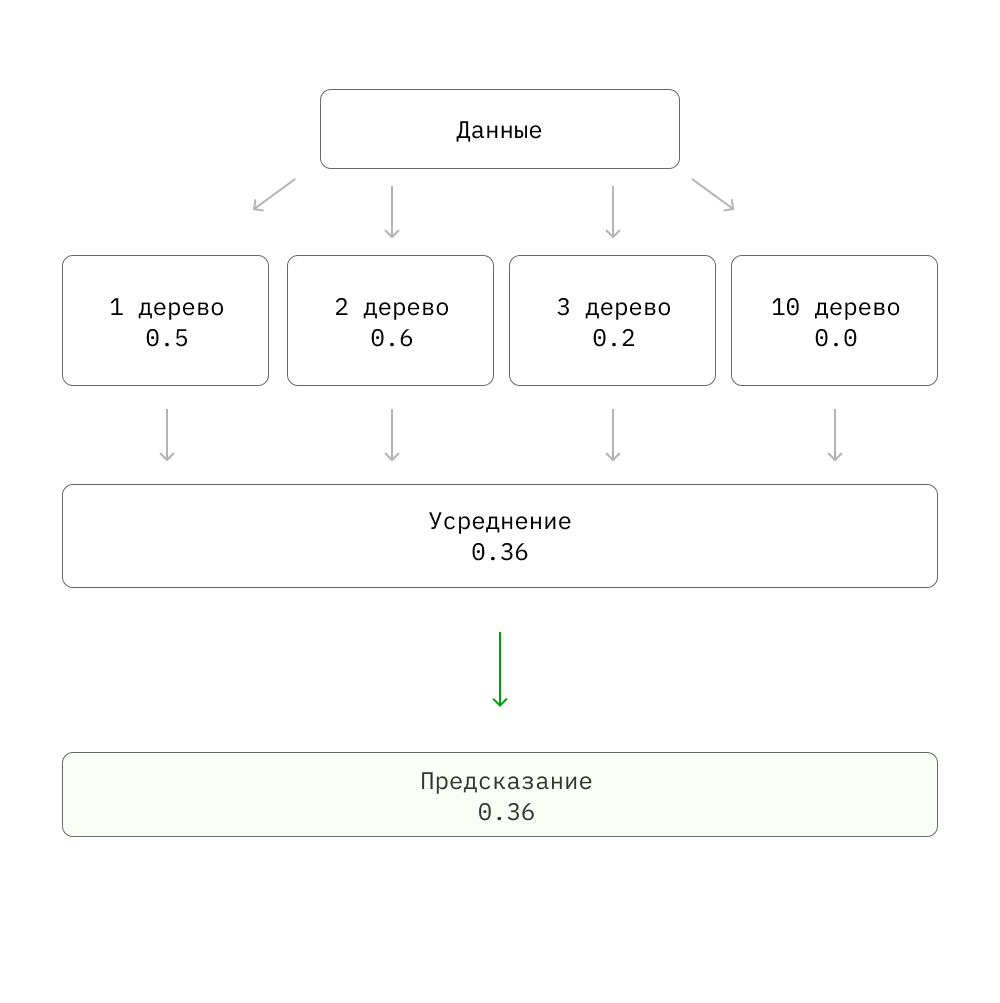

Что можно сказать о предсказаниях случайного леса на тестовых данных для задачи регрессии, если модель обучалась и была успешно обучена на данных с неотрицательной целевой меткой?

Как говорилось ранее, модель предсказывает среднее по целевой метке, то есть в процессе обучения все значения, предсказываемые моделью, были неотрицательные. Модель при предсказании будет выдавать неотрицательные значения.

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём датасет по решению задачи на прогрессирование диабета. Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

далее ноутбук

⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем дисперсия отдельной базовой модели.

Доказательство
Эта методика ансамблирования применима не только к одинаковым моделям (например к решающим деревьям), но и к любым другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

2.6 Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться недообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

Качество предсказания по MSE для решающего дерева

  нет ответа 
Качество предсказания по MSE для случайного леса

  нет ответа 

In [1]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']

In [3]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


In [4]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=2, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [5]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)

In [6]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 3432.45
Качество предсказания по MSE для случайного леса  3203.77


2.7 Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

Качество предсказания по MSE для решающего дерева

  нет ответа 
Качество предсказания по MSE для случайного леса

  нет ответа 

In [10]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=1000, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train)

# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train)

# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}') # 3565.92

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09
